In [76]:
# Pipeline
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

# Graphic libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [77]:
# Initialization
sns.set()

url = "https://github.com/renatoquiliche/Insurance-Mathematics-Economics-ADR/blob/main/Databases/insurance.csv?raw=true"

data_insurance = pd.read_csv(url)

# Data pre-processing

In [78]:
categorical = pd.get_dummies(data_insurance[["sex","smoker"]]) 
numerical = data_insurance[["age","bmi","children", "charges"]]

scaler = MinMaxScaler()

#Escalamos la data numerica a la escala de la binaria
numerical_data_scaled = pd.DataFrame(scaler.fit_transform(numerical), columns=["age","bmi","children", "charges"])

#Unimos los dos tipos de data
final_data_scaled = pd.concat([numerical_data_scaled, categorical], axis=1)

In [79]:
tsne = TSNE(n_components=2, perplexity=50, n_iter=1000, early_exaggeration=12,
            init='pca', learning_rate='auto', method='barnes_hut', n_jobs=-1)
vecs_list_tsne = tsne.fit_transform(final_data_scaled)

print("Training error: ", tsne.kl_divergence_)

Training error:  0.41560491919517517


<AxesSubplot:>

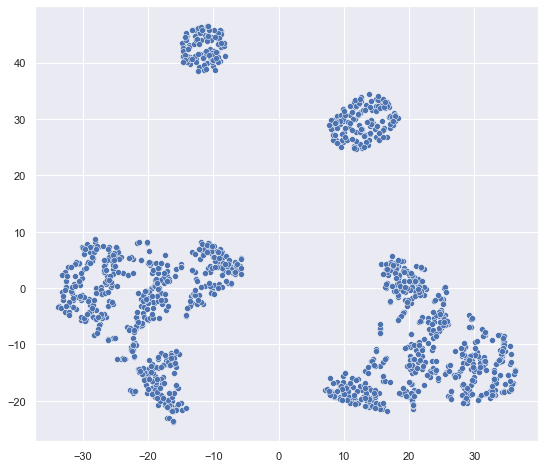

In [80]:
plt.figure(figsize=(9,8))
sns.scatterplot(x=vecs_list_tsne[:,0], y=vecs_list_tsne[:,1])

<AxesSubplot:>

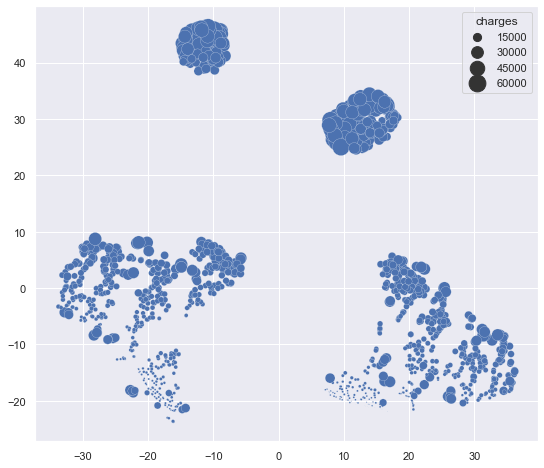

In [81]:
plt.figure(figsize=(9,8))
sns.scatterplot(x=vecs_list_tsne[:,0], y=vecs_list_tsne[:,1], size=data_insurance['charges'], sizes=(0, 300))

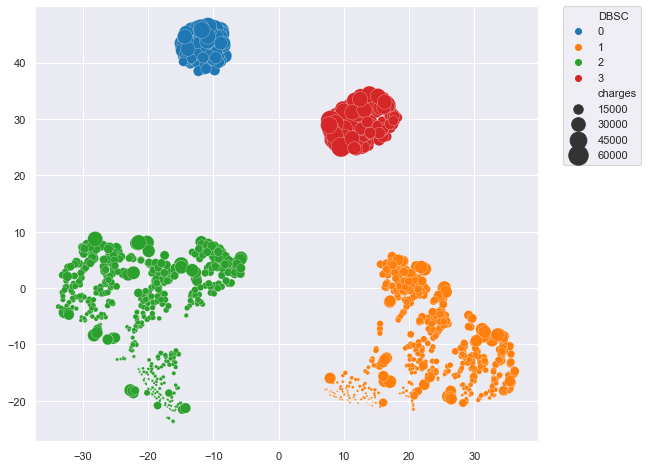

In [82]:
from sklearn.cluster import DBSCAN
components = pd.DataFrame(vecs_list_tsne, columns=['tsne1', 'tsne2'])
DBSCAN = DBSCAN(eps=3.8, min_samples=10)
DBSCAN.fit(components)

data_insurance["DBSC"] = DBSCAN.labels_

plt.figure(figsize=(9,8))
sns.scatterplot(x=vecs_list_tsne[:,0],y=vecs_list_tsne[:,1],
                hue=data_insurance["DBSC"],alpha=1, palette='tab10',
                   sizes=(0, 400), size=data_insurance['charges'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [83]:
from math import inf
data_insurance["BMI"] = pd.cut(data_insurance.bmi,bins=[0, 30, inf], labels=["Non-obesity(BMI<30)", "Obesity(BMI>30)"])

data_insurance["smoker"] = data_insurance["smoker"].astype("category") 

data_insurance["sex"] = data_insurance["sex"].astype("category") 

In [84]:
import warnings
warnings.filterwarnings("ignore")

input_simulation = data_insurance[["charges", "sex", "BMI", "smoker"]]

input_simulation["smoker"] = input_simulation["smoker"].str.replace('no','Non-smoker')
input_simulation["smoker"] = input_simulation["smoker"].str.replace('yes','Smoker')

input_simulation["sex"] = input_simulation["sex"].str.replace('male','Male')
input_simulation["sex"] = input_simulation["sex"].str.replace('female','Female', case=False)

input_simulation["CategoricalClustering"] = input_simulation["smoker"].astype(str) + " & " + input_simulation["sex"].astype(str)

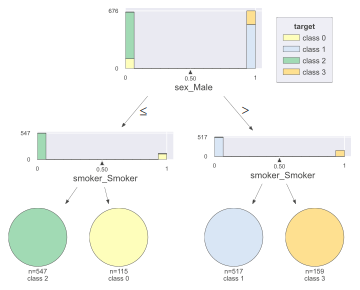

In [85]:
from dtreeviz.trees import dtreeviz # remember to load the package
from sklearn.tree import DecisionTreeClassifier

categorical = pd.get_dummies(input_simulation[["BMI", "sex", "smoker"]], drop_first=True)
numerical = data_insurance[["charges", "children", "age"]]
DecisionTree = DecisionTreeClassifier(max_leaf_nodes=None, criterion="entropy", random_state=0)

x = pd.concat([numerical, categorical], axis=1)
y = data_insurance["DBSC"]

DecisionTree.fit(x, y)

viz = dtreeviz(DecisionTree, x, y,
                target_name="target",
                feature_names=x.columns.values)

viz

# Prescription

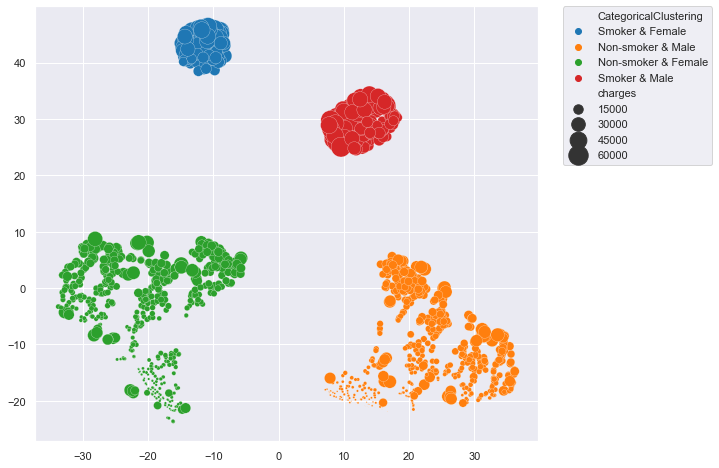

In [86]:
plt.figure(figsize=(9,8))
sns.scatterplot(x=vecs_list_tsne[:,0],y=vecs_list_tsne[:,1],
                hue=input_simulation["CategoricalClustering"],alpha=1, palette='tab10',
                   sizes=(0, 400), size=data_insurance['charges'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [87]:
data_insurance

,age,sex,bmi,children,smoker,region,charges,DBSC,BMI
0,19,female,27.900,0,yes,southwest,16884.92400,0,Non-obesity(BMI<30)
1,18,male,33.770,1,no,southeast,1725.55230,1,Obesity(BMI>30)
2,28,male,33.000,3,no,southeast,4449.46200,1,Obesity(BMI>30)
3,33,male,22.705,0,no,northwest,21984.47061,1,Non-obesity(BMI<30)
4,32,male,28.880,0,no,northwest,3866.85520,1,Non-obesity(BMI<30)
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,Obesity(BMI>30)
1334,18,female,31.920,0,no,northeast,2205.98080,2,Obesity(BMI>30)
1335,18,female,36.850,0,no,southeast,1629.83350,2,Obesity(BMI>30)
1336,21,female,25.800,0,no,southwest,2007.94500,2,Non-obesity(BMI<30)


In [88]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

x = data_insurance["smoker"]
x = sm.add_constant(x)
y = data_insurance["charges"]

In [89]:
data_insurance

,age,sex,bmi,children,smoker,region,charges,DBSC,BMI
0,19,female,27.900,0,yes,southwest,16884.92400,0,Non-obesity(BMI<30)
1,18,male,33.770,1,no,southeast,1725.55230,1,Obesity(BMI>30)
2,28,male,33.000,3,no,southeast,4449.46200,1,Obesity(BMI>30)
3,33,male,22.705,0,no,northwest,21984.47061,1,Non-obesity(BMI<30)
4,32,male,28.880,0,no,northwest,3866.85520,1,Non-obesity(BMI<30)
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,Obesity(BMI>30)
1334,18,female,31.920,0,no,northeast,2205.98080,2,Obesity(BMI>30)
1335,18,female,36.850,0,no,southeast,1629.83350,2,Obesity(BMI>30)
1336,21,female,25.800,0,no,southwest,2007.94500,2,Non-obesity(BMI<30)


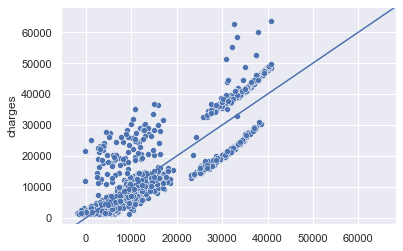

In [90]:
model = smf.ols(formula='charges ~ age + bmi + children + smoker + sex + region', data=data_insurance).fit()
summary = model.summary()

sns.scatterplot(x=model.fittedvalues, y=data_insurance['charges'])
plt.axline([10000, 10000], [65000, 65000])

In [91]:
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Sun, 02 Oct 2022   Prob (F-statistic):               0.00
Time:                        21:22:36   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.194e+04    987.819    -12.086      0.000   -1.39e+04      -1e+04
smoker[T.yes]        2.385e+04    413.153     57.723      0.000     2.3e+04    2.47e+04
sex[T.male]          -131.3144    332.945     -0.394      0.693    -784.470     521.842
region[T.northwest]  -352.9639    476.276     -0.741      0.459   -1287.298     581.370
region[T.southeast] -1035.0220    478.692     -2.162      0.031   -1974.097     -95.947
region[T.southwest]  -960.0510    477.933     -2.009      0.045   -1897.636     -22.466
age                   256.8564     11.899     21.587      0.000     233.514     280.199
bmi                   339.1935     28.599     11.860      0.000     283.088     395.298
children              475.5005    137.804      3.451      0.001     205.163     745.838
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                         311.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
import numpy as np
data_insurance['charges'] = np.log(data_insurance['charges'])
data_insurance[['age', 'bmi']] = np.log(data_insurance[['age', 'bmi']])

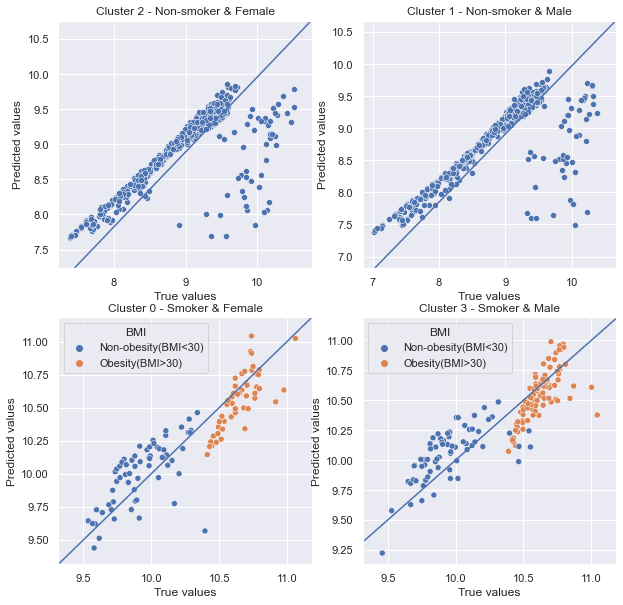

In [93]:
model_0 = smf.ols(formula='charges ~ age + bmi + children + region', data=data_insurance.loc[data_insurance['DBSC']==0]).fit()
model_1 = smf.ols(formula='charges ~ age + bmi + children + region', data=data_insurance.loc[data_insurance['DBSC']==1]).fit()
model_2 = smf.ols(formula='charges ~ age + bmi + children + region', data=data_insurance.loc[data_insurance['DBSC']==2]).fit()
model_3 = smf.ols(formula='charges ~ age + bmi + children + region', data=data_insurance.loc[data_insurance['DBSC']==3]).fit()


fig, axs = plt.subplots(2, 2)

fig.set_size_inches(10, 10)


sns.scatterplot(ax=axs[0, 0], y=model_2.fittedvalues, 
                        x=data_insurance.loc[data_insurance['DBSC']==2]['charges'])

sns.scatterplot(ax=axs[0, 1], y=model_1.fittedvalues, 
                        x=data_insurance.loc[data_insurance['DBSC']==1]['charges'])

sns.scatterplot(ax=axs[1, 0], y=model_0.fittedvalues, 
                        x=data_insurance.loc[data_insurance['DBSC']==0]['charges'], hue=data_insurance['BMI'])

sns.scatterplot(ax=axs[1, 1], y=model_3.fittedvalues, 
                        x=data_insurance.loc[data_insurance['DBSC']==3]['charges'], hue=data_insurance['BMI'])

axs[1, 0].set_title('Cluster 0 - Smoker & Female')
axs[0, 1].set_title('Cluster 1 - Non-smoker & Male')
axs[0, 0].set_title('Cluster 2 - Non-smoker & Female')
axs[1, 1].set_title('Cluster 3 - Smoker & Male')

axs[0, 0].axline([7.6, 7.4], [10.6, 10.6])
axs[0, 1].axline([7.2, 7], [10.5, 10.5])
axs[1, 0].axline([9.4, 9.4], [11.1, 11.1])
axs[1, 1].axline([9.4, 9.4], [11.1, 11.1])

for ax in axs.flat:
    ax.set(xlabel='True values', ylabel='Predicted values')

#for ax in axs.flat:
#    ax.label_outer()

In [94]:
from sklearn.metrics import mean_squared_error, median_absolute_error, mean_squared_log_error

data_insurance['charges'] = np.exp(data_insurance['charges'])

results = {'Base model': [], 'Cluster 0': [], 'Cluster 1': [], 'Cluster 2': [], 'Cluster 3': [], 'Overall': []}

results['Base model'].append(np.sqrt(mean_squared_error(data_insurance['charges'], model.fittedvalues)))
results['Base model'].append(median_absolute_error(data_insurance['charges'], model.fittedvalues))
                             
results['Cluster 0'].append(np.sqrt(mean_squared_error(data_insurance.charges[data_insurance.DBSC == 0], np.exp(model_0.fittedvalues)))) 
results['Cluster 0'].append(median_absolute_error(data_insurance.charges[data_insurance.DBSC == 0], np.exp(model_0.fittedvalues)))

results['Cluster 1'].append(np.sqrt(mean_squared_error(data_insurance.charges[data_insurance.DBSC == 1], np.exp(model_1.fittedvalues))))
results['Cluster 1'].append(median_absolute_error(data_insurance.charges[data_insurance.DBSC == 1], np.exp(model_1.fittedvalues)) )

results['Cluster 2'].append(np.sqrt(mean_squared_error(data_insurance.charges[data_insurance.DBSC == 2], np.exp(model_2.fittedvalues))))
results['Cluster 2'].append(median_absolute_error(data_insurance.charges[data_insurance.DBSC == 2], np.exp(model_2.fittedvalues)))

results['Cluster 3'].append(np.sqrt(mean_squared_error(data_insurance.charges[data_insurance.DBSC == 3], np.exp(model_3.fittedvalues))))
results['Cluster 3'].append(median_absolute_error(data_insurance.charges[data_insurance.DBSC == 3], np.exp(model_3.fittedvalues)))

data_insurance['charges_cluster'] = pd.Series(pd.Series(model_0.fittedvalues).append(pd.Series(model_1.fittedvalues)).append(pd.Series(model_2.fittedvalues)).append(pd.Series(model_3.fittedvalues)))

results['Overall'].append(np.sqrt(mean_squared_error(data_insurance['charges'], np.exp(data_insurance['charges_cluster']))))
results['Overall'].append(median_absolute_error(data_insurance['charges'], np.exp(data_insurance['charges_cluster'])))


results

{'Base model': [6041.6796511744515, 2437.7501800301834],
 'Cluster 0': [5511.721241545452, 3707.578928715957],
 'Cluster 1': [4547.640798033265, 662.0012996610167],
 'Cluster 2': [4722.793998223796, 797.1626942096209],
 'Cluster 3': [6133.475186457557, 3905.0220366676513],
 'Overall': [4918.461373430849, 867.317575823894]}

In [95]:
data_insurance['charges_cluster']

0       10.015658
1        7.523162
2        8.454579
3        8.477340
4        8.446365
          ...    
1333     9.503361
1334     7.859846
1335     7.696373
1336     7.866974
1337    10.414263
Name: charges_cluster, Length: 1338, dtype: float64

In [96]:
pd.merge()

TypeError: merge() missing 2 required positional arguments: 'left' and 'right'

In [ ]:
a = 

In [ ]:
data_insurance

,age,sex,bmi,children,smoker,region,charges,DBSC,BMI,charges_cluster
0,2.944439,female,3.328627,0,yes,southwest,9.734176,0,Non-obesity(BMI<30),10.015658
1,2.890372,male,3.519573,1,no,southeast,7.453302,1,Obesity(BMI>30),7.523162
2,3.332205,male,3.496508,3,no,southeast,8.400538,1,Obesity(BMI>30),8.454579
3,3.496508,male,3.122585,0,no,northwest,9.998092,1,Non-obesity(BMI<30),8.477340
4,3.465736,male,3.363149,0,no,northwest,8.260197,1,Non-obesity(BMI<30),8.446365
...,...,...,...,...,...,...,...,...,...,...
1333,3.912023,male,3.433019,3,no,northwest,9.268661,1,Obesity(BMI>30),9.503361
1334,2.890372,female,3.463233,0,no,northeast,7.698927,2,Obesity(BMI>30),7.859846
1335,2.890372,female,3.606856,0,no,southeast,7.396233,2,Obesity(BMI>30),7.696373
1336,3.044522,female,3.250374,0,no,southwest,7.604867,2,Non-obesity(BMI<30),7.866974


In [ ]:
median_absolute_error(np.exp(data_insurance['charges']), np.exp(data_insurance['charges_cluster']))

867.317575823894

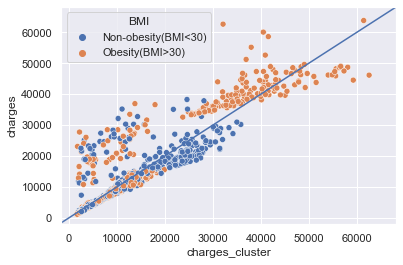

In [ ]:
sns.scatterplot(x=np.exp(data_insurance['charges_cluster']), y=np.exp(data_insurance['charges']), hue=data_insurance['BMI'])
plt.axline([10000, 10000], [65000, 65000])

In [ ]:
model_0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     66.72
Date:                Sun, 02 Oct 2022   Prob (F-statistic):           4.56e-34
Time:                        20:19:55   Log-Likelihood:                 31.744
No. Observations:                 115   AIC:                            -49.49
Df Residuals:                     108   BIC:                            -30.27
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               4.2908      0.304     14.133      0.000       3.689       4.893
region[T.northwest]     0.0247      0.050      0.490      0.625      -0.075       0.124
region[T.southeast]    -0.0548      0.050     -1.104      0.272      -0.153       0.044
region[T.southwest]     0.0034      0.055      0.062      0.951      -0.106       0.113
age                     0.2714      0.046      5.911      0.000       0.180       0.362
bmi                     1.4787      0.085     17.473      0.000       1.311       1.646
children                0.0283      0.016      1.764      0.081      -0.004       0.060
==============================================================================
Omnibus:                       21.459   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.227
Skew:                           0.831   Prob(JB):                     1.36e-08
Kurtosis:                       5.191   Cond. No.                         91.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Intercept              4.290830
region[T.northwest]    0.024684
region[T.southeast]   -0.054841
region[T.southwest]    0.003435
age                    0.271434
bmi                    1.478739
children               0.028336
dtype: float64

In [ ]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     208.5
Date:                Sun, 02 Oct 2022   Prob (F-statistic):          9.81e-134
Time:                        20:20:05   Log-Likelihood:                -287.28
No. Observations:                 517   AIC:                             588.6
Df Residuals:                     510   BIC:                             618.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               2.6644      0.346      7.705      0.000       1.985       3.344
region[T.northwest]    -0.0514      0.053     -0.970      0.333      -0.156       0.053
region[T.southeast]    -0.1725      0.055     -3.110      0.002      -0.281      -0.064
region[T.southwest]    -0.1836      0.054     -3.396      0.001      -0.290      -0.077
age                     1.6085      0.048     33.243      0.000       1.513       1.704
bmi                     0.0770      0.099      0.779      0.436      -0.117       0.271
children                0.1113      0.015      7.332      0.000       0.081       0.141
==============================================================================
Omnibus:                      384.195   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4078.441
Skew:                           3.341   Prob(JB):                         0.00
Kurtosis:                      15.028   Cond. No.                         99.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     185.9
Date:                Sun, 02 Oct 2022   Prob (F-statistic):          7.45e-128
Time:                        20:20:07   Log-Likelihood:                -273.65
No. Observations:                 547   AIC:                             561.3
Df Residuals:                     540   BIC:                             591.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               3.6020      0.332     10.860      0.000       2.950       4.253
region[T.northwest]    -0.1034      0.049     -2.098      0.036      -0.200      -0.007
region[T.southeast]    -0.1731      0.050     -3.485      0.001      -0.271      -0.076
region[T.southwest]    -0.1932      0.049     -3.966      0.000      -0.289      -0.097
age                     1.3925      0.045     31.141      0.000       1.305       1.480
bmi                     0.0673      0.090      0.751      0.453      -0.109       0.243
children                0.1012      0.014      7.018      0.000       0.073       0.130
==============================================================================
Omnibus:                      377.929   Durbin-Watson:                   2.116
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3178.260
Skew:                           3.148   Prob(JB):                         0.00
Kurtosis:                      12.990   Cond. No.                         104.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     78.68
Date:                Sun, 02 Oct 2022   Prob (F-statistic):           4.18e-44
Time:                        20:20:09   Log-Likelihood:                 43.007
No. Observations:                 159   AIC:                            -72.01
Df Residuals:                     152   BIC:                            -50.53
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               3.7561      0.311     12.086      0.000       3.142       4.370
region[T.northwest]    -0.0612      0.048     -1.279      0.203      -0.156       0.033
region[T.southeast]    -0.0541      0.041     -1.314      0.191      -0.135       0.027
region[T.southwest]    -0.0325      0.044     -0.734      0.464      -0.120       0.055
age                     0.3449      0.040      8.684      0.000       0.266       0.423
bmi                     1.5709      0.081     19.376      0.000       1.411       1.731
children               -0.0035      0.013     -0.263      0.793      -0.030       0.023
==============================================================================
Omnibus:                        4.496   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.106   Jarque-Bera (JB):                4.090
Skew:                           0.381   Prob(JB):                        0.129
Kurtosis:                       3.191   Cond. No.                         112.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""